In [43]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import sklearn
from sklearn import metrics

In [44]:
# Data source: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
path = os.getcwd() + "/data/Google-Playstore.csv"
df = pd.read_csv(path)
print(df.shape)

(2312944, 24)


In [45]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   
5                                             IMOCCI   
6                   unlimited 4G data prank free app   
7                              The Everyday Calendar   
8                                          WhatsOpen   
9                   Neon 3d Iron Tech Keyboard Theme   

                                          App Id          Category  Rating  \
0                            com.ishakwe.gakondo         Adventure     0.0   
1                     com.webserveis.batteryinfo             Tools     4.4   
2                           com.doantiepvien.crm      Productivity     0.0   
3                        cst.stJoseph.ug17ucs548     Communication     5.0   
4                           com.horodyski.grower             Tools     0.0   
5                                     com.imocci            Social     0.0   
6  getfreedata.superfatiza.unlimitedjiodataprank  Libraries & Demo     4.5   
7                         com.mozaix.simoneboard         Lifestyle     2.0   
8                              com.whatsopen.app     Communication     0.0   
9          com.ikeyboard.theme.neon_3d.iron.tech   Personalization     4.7   

   Rating Count Installs  Minimum Installs  Maximum Installs  Free  Price  \
0           0.0      10+              10.0                15  True    0.0   
1          64.0   5,000+            5000.0              7662  True    0.0   
2           0.0      50+              50.0                58  True    0.0   
3           5.0      10+              10.0                19  True    0.0   
4           0.0     100+             100.0               478  True    0.0   
5           0.0      50+              50.0                89  True    0.0   
6          12.0   1,000+            1000.0              2567  True    0.0   
7          39.0     500+             500.0               702  True    0.0   
8           0.0      10+              10.0                18  True    0.0   
9         820.0  50,000+           50000.0             62433  True    0.0   

   ...                    Developer Website                  Developer Email  \
0  ...          https://beniyizibyose.tk/#/           jean21101999@gmail.com   
1  ...      https://webserveis.netlify.app/             webserveis@gmail.com   
2  ...                                  NaN              vnacrewit@gmail.com   
3  ...     http://www.climatesmarttech.com/      climatesmarttech2@gmail.com   
4  ...          http://www.horodyski.com.pl        rmilekhorodyski@gmail.com   
5  ...                http://www.imocci.com                  info@imocci.com   
6  ...                                  NaN  aitomgharfatimezzahra@gmail.com   
7  ...                                  NaN          elementuser03@gmail.com   
8  ...             http://yilvermolinah.com          yilver.mh1996@gmail.com   
9  ...  https://trendyteme888-31139.web.app         trendyteme.888@gmail.com   

       Released  Last Updated Content Rating  \
0  Feb 26, 2020  Feb 26, 2020       Everyone   
1  May 21, 2020  May 06, 2021       Everyone   
2   Aug 9, 2019  Aug 19, 2019       Everyone   
3  Sep 10, 2018  Oct 13, 2018       Everyone   
4  Feb 21, 2020  Nov 12, 2018       Everyone   
5  Dec 24, 2018  Dec 20, 2019           Teen   
6  Sep 23, 2019  Sep 27, 2019       Everyone   
7  Jun 21, 2019  Jun 21, 2019       Everyone   
8           NaN  Dec 07, 2018           Teen   
9  Sep 22, 2019  Oct 07, 2020       Everyone   

                                      Privacy Policy Ad Supported  \
0                 https://beniyizibyose.tk/projects/        False   
1  https://dev4phones.wordpress.com/licencia-de-uso/         True   
2  https://www.vietnamairlines.com/vn/en/terms-an...        False   
3                                 

In [46]:
df = df.drop(['Scraped Time', 'Developer Id', 'Installs', 'Currency', 'Minimum Installs',  #'Size',
'Developer Website', 'Developer Email', 'Privacy Policy', 'Minimum Android', 'Content Rating', 
'Editors Choice'], axis=1)

#This one app had only 1 maximum install but an incredible number of ratings.
df = df[df['App Id'] != 'com.google.android.apps.wellbeing']
df.shape

(2312943, 13)

In [47]:
cat_name = 'Super Category'
df[cat_name] = df['Category']
df[cat_name] = df[cat_name].replace(['Adventure', 'Racing', 'Puzzle', 'Entertainment', 'Arcade', 'Photography', 'Sports', 'Card', 'Trivia', 'Strategy', 'Action', 'Simulation', 'Casino', 'Comics'], 'Entertainment')
df[cat_name] = df[cat_name].replace(['Communication', 'Social', 'Events', 'Dating', 'Role Playing', 'Lifestyle', 'Personalization', 'Medical', 'Health & Fitness', 'Beauty', 'Parenting'], 'Personal & Social')
df[cat_name] = df[cat_name].replace(['Productivity', 'Books & Reference', 'Education', 'Business', 'Educational', 'Finance'], 'Development')
df[cat_name] = df[cat_name].replace(['Casual', 'Tools', 'Libraries & Demo', 'Maps & Navigation', 'Travel & Local', 'Food & Drink', 'Music', 'Auto & Vehicles','Shopping', 'Board', 'Music & Audio', 'News & Magazines', 'Art & Design', 'House & Home', 'Weather', 'Word', 'Video Players & Editors'], 'Other')
df[cat_name] = df[cat_name].astype('category')
df[cat_name].value_counts()

Other                736773
Development          668061
Personal & Social    460998
Entertainment        447111
Name: Super Category, dtype: int64

In [48]:
df['Rating Bin'] = pd.cut(df['Rating'],bins=[0,3.9,4.4,5], labels=['Bad App Yo', 'Moderate', 'Superb'])
# labels=['Bad App Yo', 'Moderate', 'Superb']

In [49]:
df['App Name'] = df['App Name'].apply(str)
df['Name Length'] = df['App Name'].apply(len)

In [50]:
#What kind of Size values exist, going by the text part of the string
SizeCats = df['Size'].apply(lambda x: re.findall('([\sA-Za-z]*$)', str(x))[0])
print(SizeCats.value_counts())

#Knowing there are three kinds of known sizes (kb, Mb, Gb) we convert these to Mb
#But because there are also missing values or OS dependent sizes, we store this categorically in an extra column
#(known sizes will be categorized as 'known')
def process_Size(value):
    value = str(value)
    conversion = {'k':0.001, 'M':1.0, 'G':1000.0}
    if value[-1] in conversion.keys():
        value = value.replace(',', '') #added because some 
        size = float(value[:-1]) * conversion[value[-1]]
        category = 'Known'
    else:
        size = None
        category = value
    return (size, category)


temp_df = pd.DataFrame(df['Size'].apply(lambda x: process_Size(x)).tolist(), columns=['Size', 'Size Cat'])
df['Size'] = temp_df['Size'].values
df['Size Cat'] = temp_df['Size Cat'].values
del temp_df
df.shape

M                     2201704
Varies with device      74777
k                       36253
nan                       196
G                          13
Name: Size, dtype: int64


(2312943, 17)

In [51]:
date_of_dataset = 2021
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Time since last update'] = pd.to_datetime(df['Last Updated']).apply(lambda date: date_of_dataset - int(date.year))

df['Released'] = pd.to_datetime(df['Released'])
df['Days Release to Last Update'] = (df['Last Updated'] - df['Released']).dt.days

In [52]:
df.isnull().sum()

App Name                             0
App Id                               0
Category                             0
Rating                           22883
Rating Count                     22883
Maximum Installs                     0
Free                                 0
Price                                0
Size                             74973
Released                         71053
Last Updated                         0
Ad Supported                         0
In App Purchases                     0
Super Category                       0
Rating Bin                     1082645
Name Length                          0
Size Cat                             0
Time since last update               0
Days Release to Last Update      71053
dtype: int64

In [53]:
#Time for some visual exploration
#But first a reload station for data so far
df.to_parquet('data/Google-Playstore-exploration.parquet')

In [87]:
df = pd.read_parquet("data/Google-Playstore-exploration.parquet", engine='fastparquet')

In [95]:
df.head()

App Name  \
index                                                      
0                                                Gakondo   
1                                    Ampere Battery Info   
2                                                 Vibook   
3      Smart City Trichy Public Service Vehicles 17UC...   
4                                                GROW.me   

                           App Id       Category  Rating  Rating Count  \
index                                                                    
0             com.ishakwe.gakondo      Adventure     0.0           0.0   
1      com.webserveis.batteryinfo          Tools     4.4          64.0   
2            com.doantiepvien.crm   Productivity     0.0           0.0   
3         cst.stJoseph.ug17ucs548  Communication     5.0           5.0   
4            com.horodyski.grower          Tools     0.0           0.0   

       Maximum Installs  Free  Price  Size   Released Last Updated  \
index                                                                
0                    15  True    0.0  10.0 2020-02-26   2020-02-26   
1                  7662  True    0.0   2.9 2020-05-21   2021-05-06   
2                    58  True    0.0   3.7 2019-08-09   2019-08-19   
3                    19  True    0.0   1.8 2018-09-10   2018-10-13   
4                   478  True    0.0   6.2 2020-02-21   2018-11-12   

       Ad Supported  In App Purchases     Super Category Rating Bin  \
index                                                                 
0             False             False      Entertainment        NaN   
1              True             False              Other   Moderate   
2             False             False        Development        NaN   
3              True             False  Personal & Social     Superb   
4             False             False              Other        NaN   

       Name Length Size Cat  Time since last update  \
index                                                 
0                7    Known                       1   
1               19    Known                       0   
2                6    Known                       2   
3               50    Known                       3   
4                7    Known                       3   

       Days Release to Last Update  
index                               
0                              0.0  
1                            350.0  
2                             10.0  
3                             33.0  
4                           -466.0

In [99]:
# sample from dataframe
from sklearn.model_selection import train_test_split
p_df, s_df = train_test_split(df, test_size=300, random_state=123) #parked and small subset

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


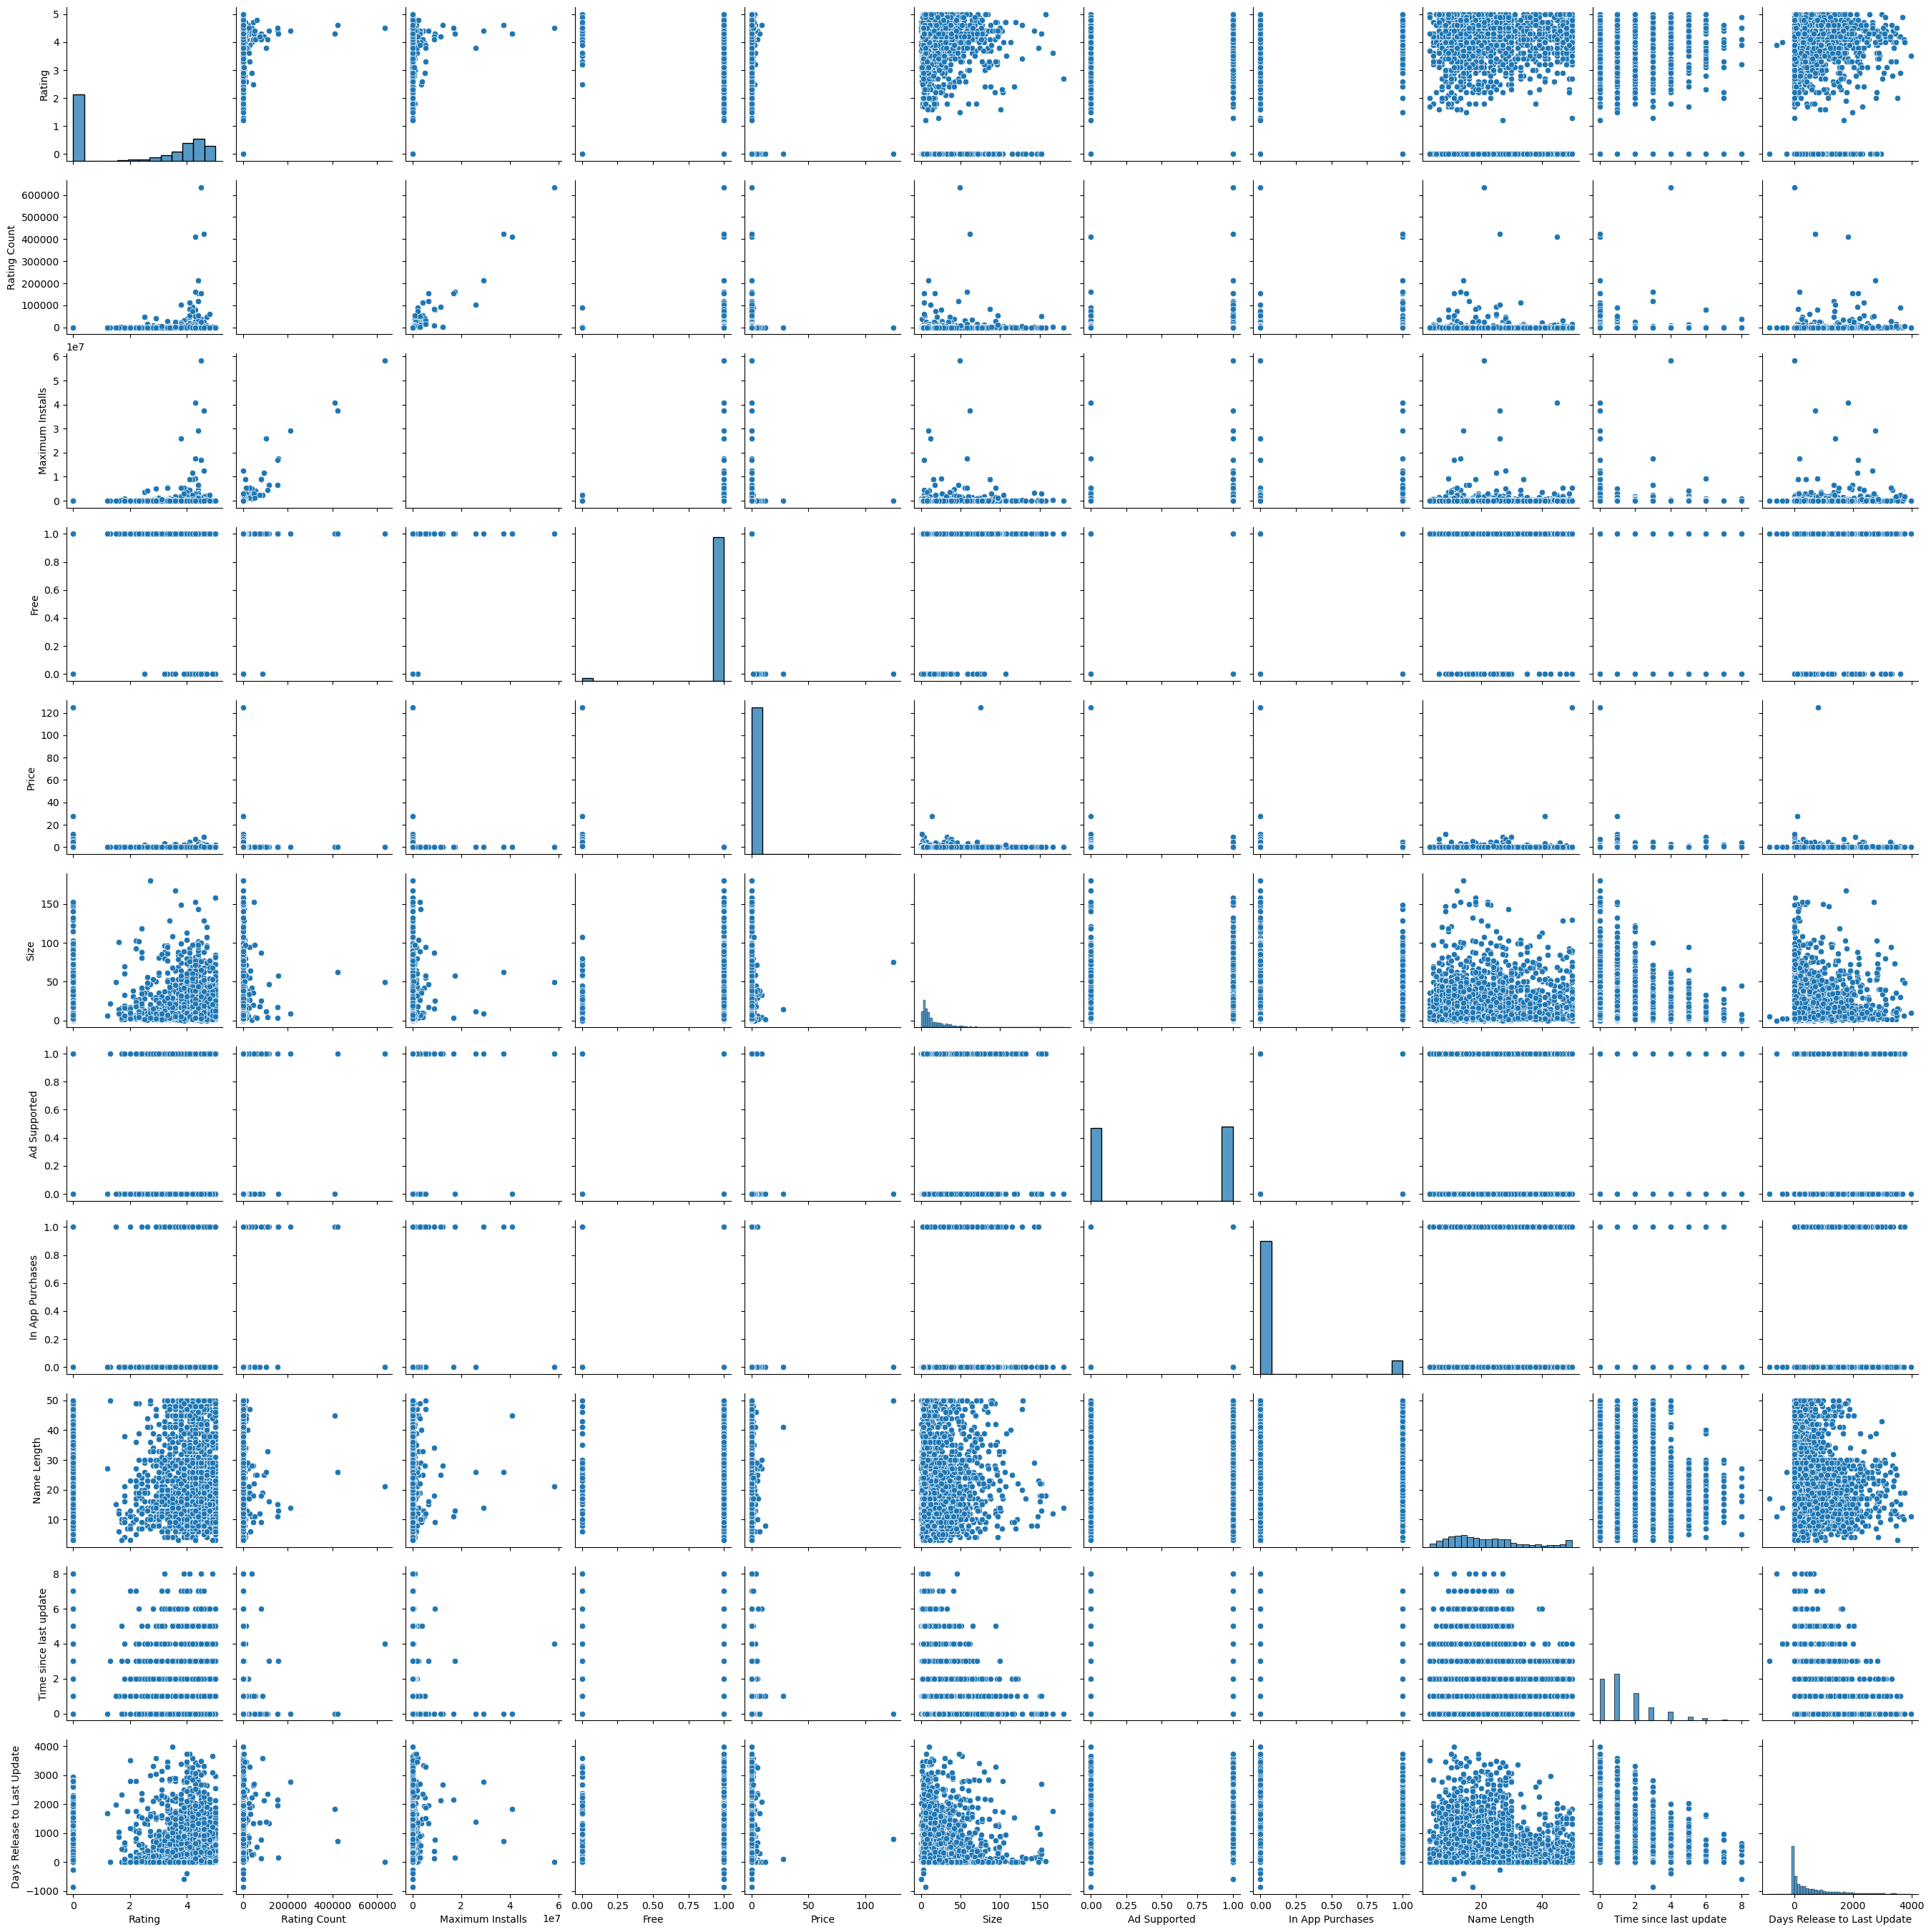

In [102]:
sns.pairplot(s_df)

In [103]:
# We can already filter on less than 100.000 installs and at least 10 ratings
df = df[(df['Maximum Installs'] < 100000) & (df['Rating Count'] >= 10)]
df['Rating Count'] = df['Rating Count'].astype(int)
df.shape

C:\Users\~LarsSpekschoorTrain\AppData\Local\Temp\ipykernel_19064\1028336603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating Count'] = df['Rating Count'].astype(int)


(806021, 19)

In [104]:
#Several columns are better log-transformed
log_transform_cols = ['Rating Count', 'Maximum Installs', 'Price', 'Size', 'Days Release to Last Update']
for col in log_transform_cols:
    df[col] = np.log10(df[col]+1)
    df = df.rename(columns={col:('log_'+col)})

C:\Users\~LarsSpekschoorTrain\AppData\Local\Temp\ipykernel_19064\2923760116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log10(df[col]+1)
c:\Users\~LarsSpekschoorTrain\OneDrive - Smart Data People\Documenten\Praktijkopdracht\SDP_PO_123\envs\SDP_PO\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\~LarsSpekschoorTrain\OneDrive - Smart Data People\Documenten\Praktijkopdracht\SDP_PO_123\envs\SDP_PO\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


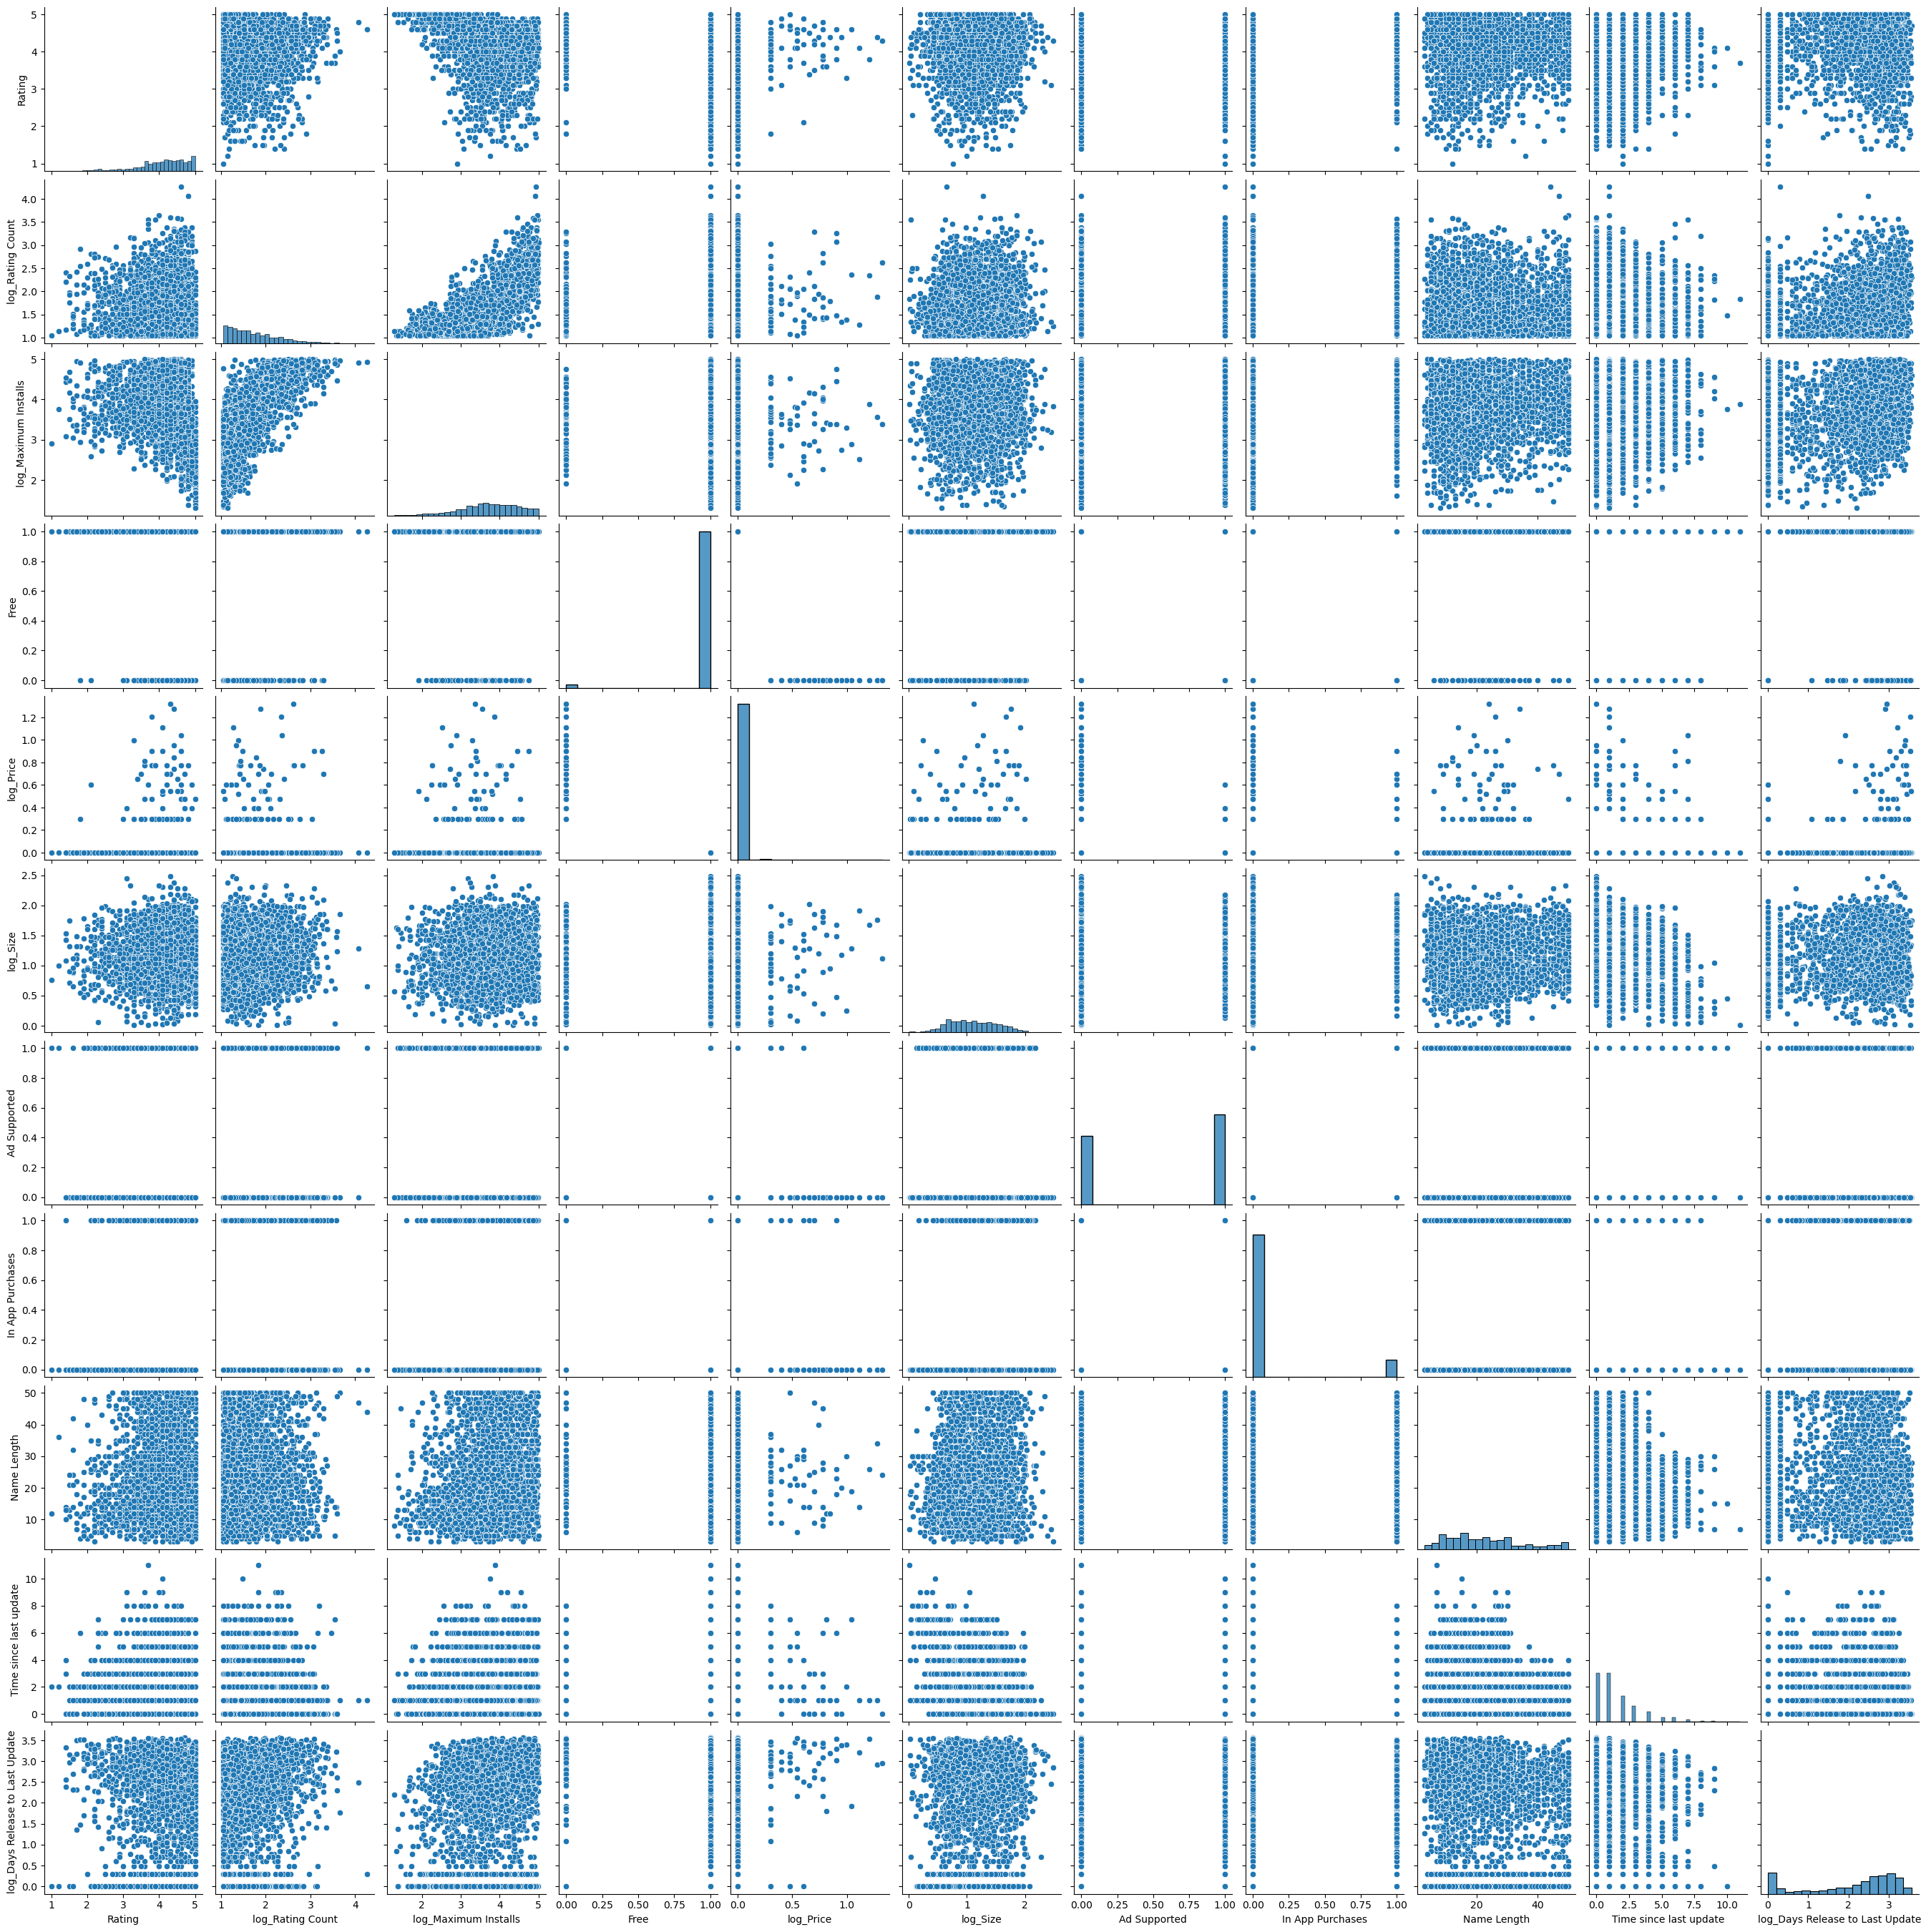

In [105]:
p_df, s_df = train_test_split(df, test_size=300, random_state=123) #parked and small subset
sns.pairplot(s_df)

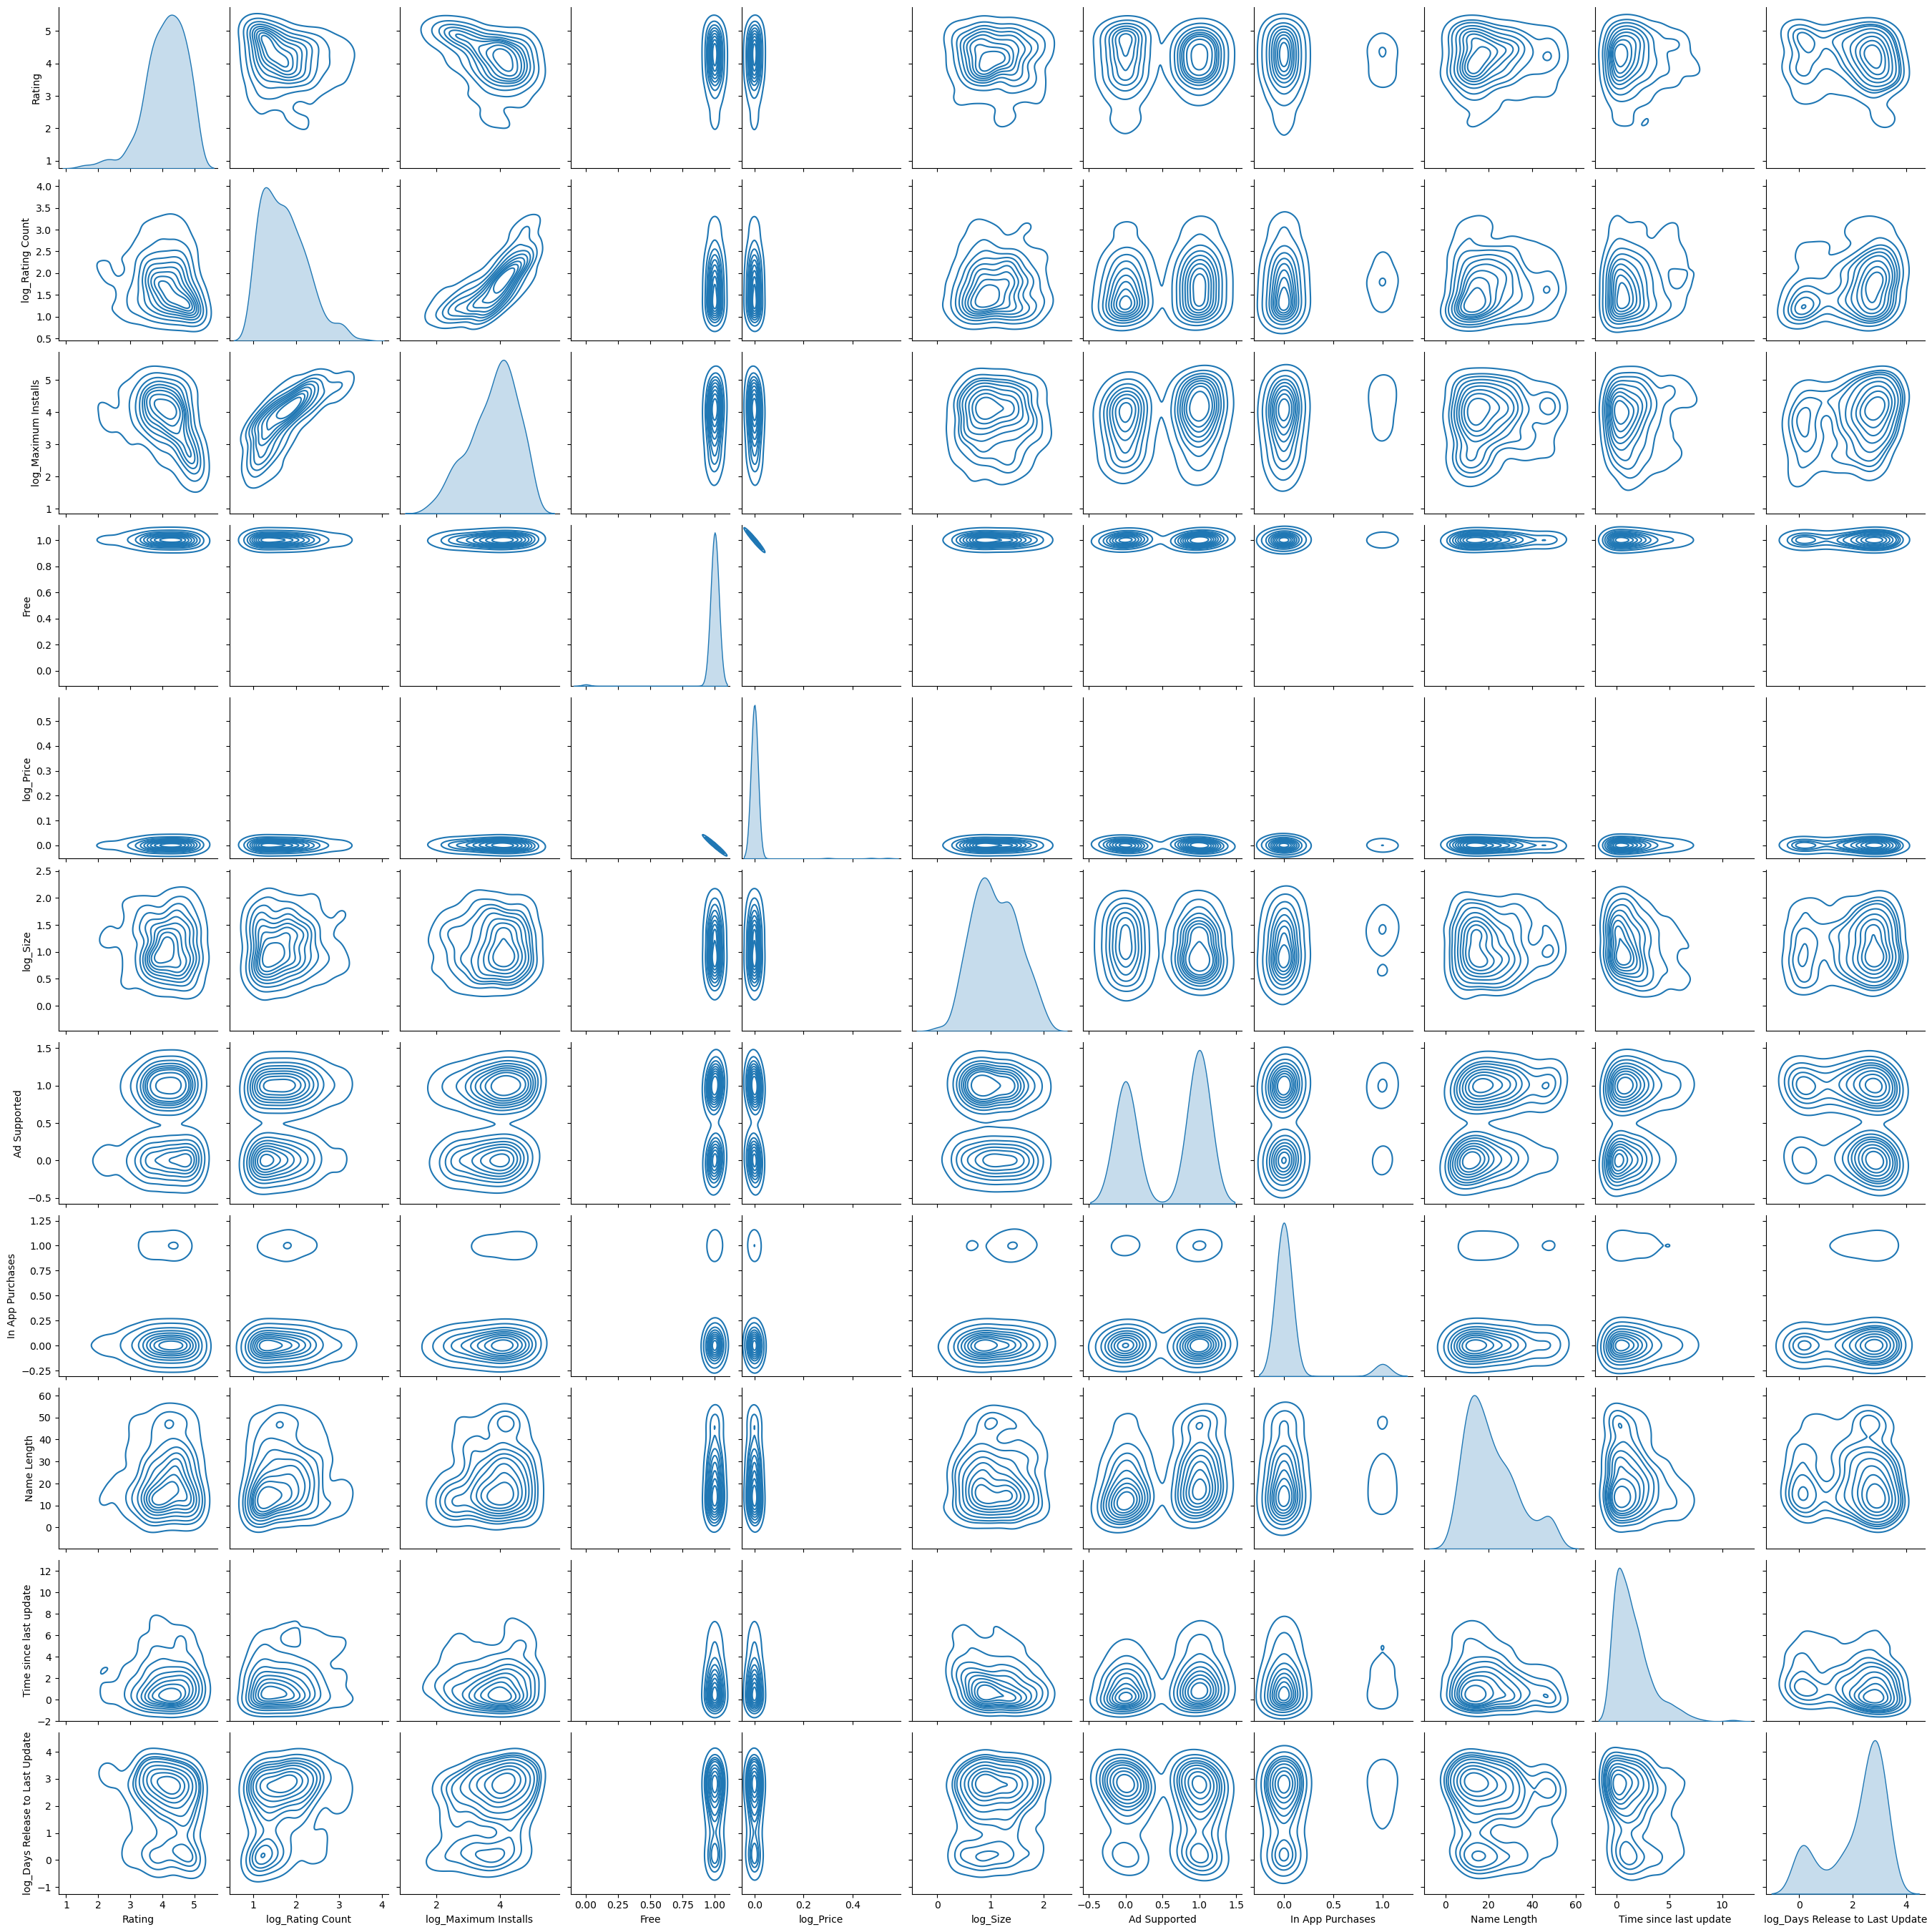

In [107]:
p_df, s_df = train_test_split(df, test_size=300, random_state=123) #parked and small subset
sns.pairplot(s_df, kind='kde')

Known                 783378
Varies with device     22643
Name: Size Cat, dtype: int64


<AxesSubplot: title={'center': 'log_Maximum Installs'}, xlabel='Size Cat'>

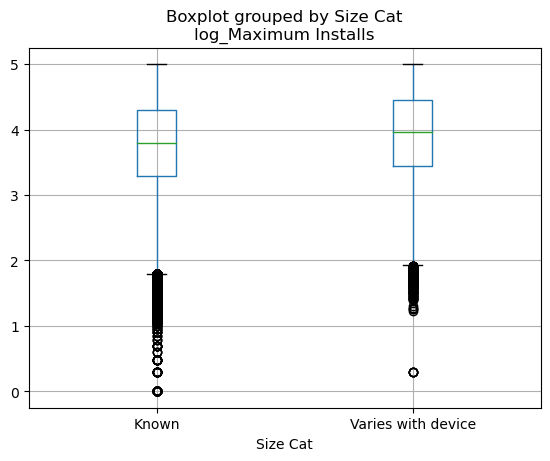

In [108]:
#Visualize max installs over different Size categories
print(df['Size Cat'].value_counts())
df.boxplot(column='log_Maximum Installs', by='Size Cat')

In [111]:
df = df.drop(['log_Size'], axis=1)
df = df.dropna()
print(df.shape)

(785931, 18)


In [112]:
df.head()

App Name  \
index                                     
1                   Ampere Battery Info   
6      unlimited 4G data prank free app   
7                 The Everyday Calendar   
9      Neon 3d Iron Tech Keyboard Theme   
10                      Dodge The Cars!   

                                              App Id          Category  \
index                                                                    
1                         com.webserveis.batteryinfo             Tools   
6      getfreedata.superfatiza.unlimitedjiodataprank  Libraries & Demo   
7                             com.mozaix.simoneboard         Lifestyle   
9              com.ikeyboard.theme.neon_3d.iron.tech   Personalization   
10              com.MrScratchEnterprises.CarDogeGame            Racing   

       Rating  log_Rating Count  log_Maximum Installs  Free  log_Price  \
index                                                                    
1         4.4          1.812913              3.884399  True        0.0   
6         4.5          1.113943              3.409595  True        0.0   
7         2.0          1.602060              2.846955  True        0.0   
9         4.7          2.914343              4.795421  True        0.0   
10        4.9          1.748188              2.518514  True        0.0   

        Released Last Updated  Ad Supported  In App Purchases  \
index                                                           
1     2020-05-21   2021-05-06          True             False   
6     2019-09-23   2019-09-27          True             False   
7     2019-06-21   2019-06-21         False             False   
9     2019-09-22   2020-10-07          True             False   
10    2020-07-30   2020-07-30         False             False   

          Super Category  Rating Bin  Name Length Size Cat  \
index                                                        
1                  Other    Moderate           19    Known   
6                  Other      Superb           32    Known   
7      Personal & Social  Bad App Yo           21    Known   
9      Personal & Social      Superb           32    Known   
10         Entertainment      Superb           15    Known   

       Time since last update  log_Days Release to Last Update  
index                                                           
1                           0                         2.545307  
6                           2                         0.698970  
7                           2                         0.000000  
9                           1                         2.582063  
10                          1                         0.000000

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785931 entries, 1 to 2312943
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   App Name                         785931 non-null  object        
 1   App Id                           785931 non-null  object        
 2   Category                         785931 non-null  object        
 3   Rating                           785931 non-null  float64       
 4   log_Rating Count                 785931 non-null  float64       
 5   log_Maximum Installs             785931 non-null  float64       
 6   Free                             785931 non-null  bool          
 7   log_Price                        785931 non-null  float64       
 8   Released                         785931 non-null  datetime64[ns]
 9   Last Updated                     785931 non-null  datetime64[ns]
 10  Ad Supported                     785931 non

In [114]:
df['Rating Bin'].value_counts()

Superb        275668
Bad App Yo    260648
Moderate      249615
Name: Rating Bin, dtype: int64

**Code below is still in development**

In [19]:
def prepare_inputs(encoder_type, feature):
    try:
        ohe = encoder_type
        return df.join(pd.DataFrame(data=ohe.fit_transform(df[[feature]]).toarray(), dtype=np.int8, 
            columns=list(df[feature].unique())))
    except:
        print("Get right column")

# reset index to be able to perform the join
df = df.reset_index(drop=True)

# one hot encoder
df = prepare_inputs(sklearn.preprocessing.OneHotEncoder(), 'Rating Bin')
df = prepare_inputs(sklearn.preprocessing.OneHotEncoder(), 'Super Category')

In [20]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count',
       'Maximum Installs', 'Free', 'Price', 'Released', 'Last Updated',
       'Ad Supported', 'In App Purchases', 'Super Category', 'Rating Bin',
       'Name Length', 'Size Cat', 'Time since last update',
       'Days Release to Last Update', 'log10 Maximum Installs', 'Moderate',
       'Superb', 'Bad App Yo', 'Other', 'Personal & Social', 'Entertainment',
       'Development'],
      dtype='object')

In [21]:
df = df.drop(['Last Updated', 'Rating', 'Category', 'Super Category', 'Rating Bin', 'Other', 'Released'], axis=1)
# 'Rating Bin'

In [22]:
df.head()

App Name  \
0               Ampere Battery Info   
1  unlimited 4G data prank free app   
2             The Everyday Calendar   
3  Neon 3d Iron Tech Keyboard Theme   
4                   Dodge The Cars!   

                                          App Id  Rating Count  \
0                     com.webserveis.batteryinfo            64   
1  getfreedata.superfatiza.unlimitedjiodataprank            12   
2                         com.mozaix.simoneboard            39   
3          com.ikeyboard.theme.neon_3d.iron.tech           820   
4           com.MrScratchEnterprises.CarDogeGame            55   

   Maximum Installs  Free  Price  Ad Supported  In App Purchases  Name Length  \
0              7662  True    0.0          True             False           19   
1              2567  True    0.0          True             False           32   
2               702  True    0.0         False             False           21   
3             62433  True    0.0          True             False           32   
4               329  True    0.0         False             False           15   

  Size Cat  Time since last update  Days Release to Last Update  \
0    Known                       0                        350.0   
1    Known                       2                          4.0   
2    Known                       2                          0.0   
3    Known                       1                        381.0   
4    Known                       1                          0.0   

   log10 Maximum Installs  Moderate  Superb  Bad App Yo  Personal & Social  \
0                3.884342         0       1           0                  0   
1                3.409426         0       0           1                  0   
2                2.846337         1       0           0                  0   
3                4.795414         0       0           1                  0   
4                2.517196         0       0           1                  1   

   Entertainment  Development  
0              1            0  
1              1            0  
2              0            1  
3              0            1  
4              0            0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788927 entries, 0 to 788926
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   App Name                     788927 non-null  object 
 1   App Id                       788927 non-null  object 
 2   Rating Count                 788927 non-null  int32  
 3   Maximum Installs             788927 non-null  int64  
 4   Free                         788927 non-null  bool   
 5   Price                        788927 non-null  float64
 6   Ad Supported                 788927 non-null  bool   
 7   In App Purchases             788927 non-null  bool   
 8   Name Length                  788927 non-null  int64  
 9   Size Cat                     788927 non-null  object 
 10  Time since last update       788927 non-null  int64  
 11  Days Release to Last Update  788927 non-null  float64
 12  log10 Maximum Installs       788927 non-null  float64
 13 

In [24]:
df.to_parquet('data\Google-Playstore-Modified.parquet')